In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
sns.set()
%matplotlib inline

In [2]:
df1 = pd.read_csv('Eskwecabs Data 2016 TRULY_FIXED.csv', delimiter = ';', decimal = ',')
df1.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",31/07/2016,1224,5820,00:00:38,safe
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",31/07/2016,1385,5511,00:00:52,safe
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",31/07/2016,2257,5405,00:01:46,safe
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",31/07/2016,1242,5262,00:02:26,safe
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",31/07/2016,1787,5511,00:02:36,safe


In [3]:
display(df1.shape)
display(df1.info())
display(df1.describe())

(200000, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
Destination Display Name    200000 non-null object
Destination Geometry        200000 non-null object
Date                        200000 non-null object
Travel time (seconds)       200000 non-null int64
DriverID                    200000 non-null int64
Time                        200000 non-null object
Unsafe                      200000 non-null object
dtypes: int64(2), object(5)
memory usage: 10.7+ MB


None

,Travel time (seconds),DriverID
count,200000.000000,200000.000000
mean,2514.353160,5442.147900
std,1109.687048,283.040984
min,38.000000,5005.000000
25%,1713.000000,5220.000000
50%,2452.000000,5404.000000
75%,3275.000000,5671.000000
max,7296.000000,5984.000000


In [4]:
df1.isnull().sum()

Destination Display Name    0
Destination Geometry        0
Date                        0
Travel time (seconds)       0
DriverID                    0
Time                        0
Unsafe                      0
dtype: int64

In [5]:
df1.duplicated().sum()

0

In [6]:
df1['Unsafe'].value_counts()

safe        172736
not safe     16947
unsafe       10317
Name: Unsafe, dtype: int64

In [7]:
df1['Unsafe'] = df1['Unsafe'].replace(to_replace='not safe', value='unsafe', regex=True)
df1['Unsafe'].value_counts()

safe      172736
unsafe     27264
Name: Unsafe, dtype: int64

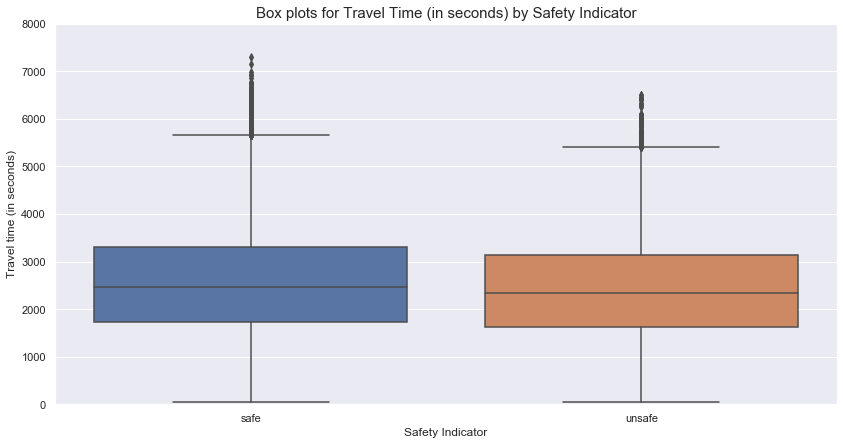

In [8]:
plt.figure(figsize = (14, 7))
df1_tt = df1[['Travel time (seconds)', 'Unsafe']]
test1 = sns.boxplot(x = 'Unsafe', y = 'Travel time (seconds)', data = df1_tt)
test1.set_ylim(0,8000)
plt.title('Box plots for Travel Time (in seconds) by Safety Indicator', fontsize = 15)
plt.xlabel('Safety Indicator')
plt.ylabel('Travel time (in seconds)')
plt.show()

In [9]:
df1_city = df1.copy()
df1_city['Destination Display Name'] = df1_city['Destination Display Name'].apply(lambda x: x.split(','))
df1_city['City Destination'] = df1_city['Destination Display Name'].apply(lambda x:x[-1])
df1_city.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,City Destination
0,"[4800 Balderama, Makati]","[121,005416381948; 14,5501868058048]",31/07/2016,1224,5820,00:00:38,safe,Makati
1,"[0 1st Street, Quezon City]","[121,034062093452; 14,6142310276554]",31/07/2016,1385,5511,00:00:52,safe,Quezon City
2,"[0 Hydra, Makati]","[121,031114652068; 14,5616123563658]",31/07/2016,2257,5405,00:01:46,safe,Makati
3,"[Roxas Boulevard, Pasay]","[120,989193110978; 14,5378405260156]",31/07/2016,1242,5262,00:02:26,safe,Pasay
4,"[100 Jupiter, Mandaluyong]","[121,019737475982; 14,5822100699773]",31/07/2016,1787,5511,00:02:36,safe,Mandaluyong


In [10]:
df1_city['City Destination'].value_counts()

 Manila                 52292
 Quezon City            37701
 Makati                 25644
 Pasay                  15593
 Pasig                  12078
 Taguig                 10975
 Mandaluyong            10705
 Paranaque              10397
 San Juan                8882
 Lungsod Quezon          6217
 Marikina                4787
 Maynila                 4264
 Lungsod ng San Juan      465
Name: City Destination, dtype: int64

In [11]:
df1_city['City Destination'] = df1_city['City Destination'].replace(to_replace = 'Maynila', value = 'Manila', regex=True)
df1_city['City Destination'] = df1_city['City Destination'].replace(to_replace = 'Lungsod ng San Juan', value = 'San Juan', regex=True)
df1_city['City Destination'] = df1_city['City Destination'].replace(to_replace = 'Lungsod Quezon', value = 'Quezon City', regex=True)
df1_city['City Destination'].value_counts()

 Manila         56556
 Quezon City    43918
 Makati         25644
 Pasay          15593
 Pasig          12078
 Taguig         10975
 Mandaluyong    10705
 Paranaque      10397
 San Juan        9347
 Marikina        4787
Name: City Destination, dtype: int64

<Figure size 1008x504 with 0 Axes>

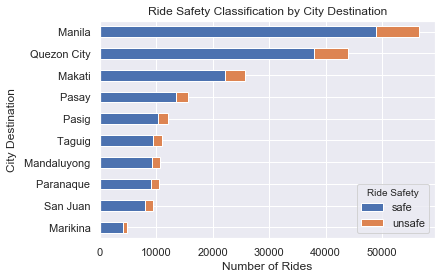

In [12]:
plt.figure(figsize = (14, 7))
test1 = df1_city.groupby(['City Destination', 'Unsafe'])['City Destination'].count().unstack('Unsafe').fillna(0)
test1['total'] = test1['safe'] + test1['unsafe']
test1_sort = test1.sort_values(by = 'total', ascending = True)
test1_sort.plot.barh(y = ['safe', 'unsafe'], stacked = True)
plt.legend(title = 'Ride Safety')
plt.title('Ride Safety Classification by City Destination')
plt.xlabel('Number of Rides')
plt.show()

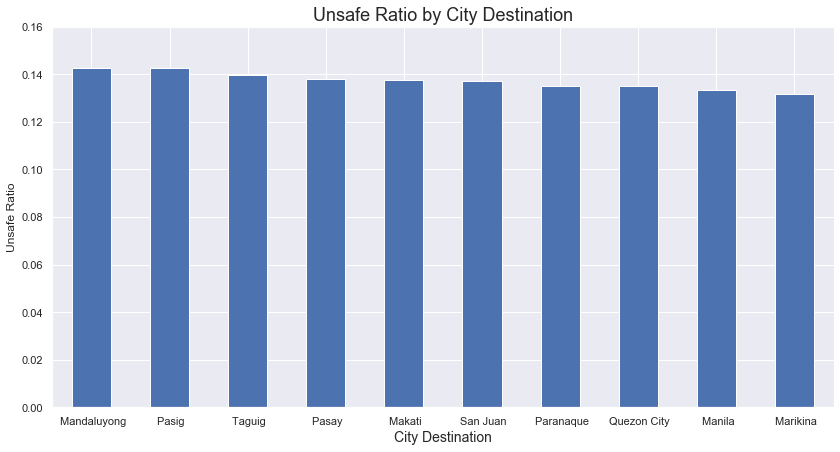

In [13]:
plt.figure(figsize = (14, 7))
test1['Unsafe Ratio'] = test1['unsafe'] / (test1['safe'] + test1['unsafe']) 
test11 = test1['Unsafe Ratio'].sort_values(ascending = False).plot.bar()
plt.title('Unsafe Ratio by City Destination', fontsize = 18)
plt.xlabel('City Destination', fontsize = 14)
plt.xticks(rotation = 0)
plt.ylabel('Unsafe Ratio')
test11.set_ylim(0,0.16)
plt.show()

In [14]:
df1_time = df1.copy()
df1_time['Time'] = df1_time['Time'].apply(lambda x: x.split(':'))
df1_time['Hour Period'] = df1_city['Time'].apply(lambda x:x[0:2]).astype(str).astype(int)
df1_time.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Hour Period
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",31/07/2016,1224,5820,"[00, 00, 38]",safe,0
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",31/07/2016,1385,5511,"[00, 00, 52]",safe,0
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",31/07/2016,2257,5405,"[00, 01, 46]",safe,0
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",31/07/2016,1242,5262,"[00, 02, 26]",safe,0
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",31/07/2016,1787,5511,"[00, 02, 36]",safe,0


<Figure size 1008x504 with 0 Axes>

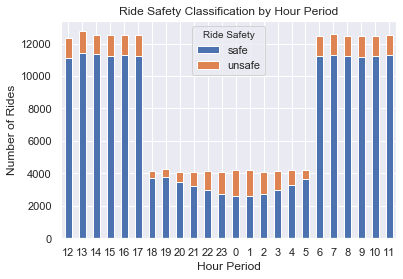

In [15]:
plt.figure(figsize = (14, 7))
test2 = df1_time.groupby(['Hour Period', 'Unsafe'])['Hour Period'].count().unstack('Unsafe').fillna(0)
hourlist = list(np.arange(12, 24)) + list(np.arange(0, 12))
test2.loc[hourlist].plot.bar(stacked = True)
plt.legend(title = 'Ride Safety')
plt.title('Ride Safety Classification by Hour Period')
plt.xlabel('Hour Period')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 0)
plt.show()

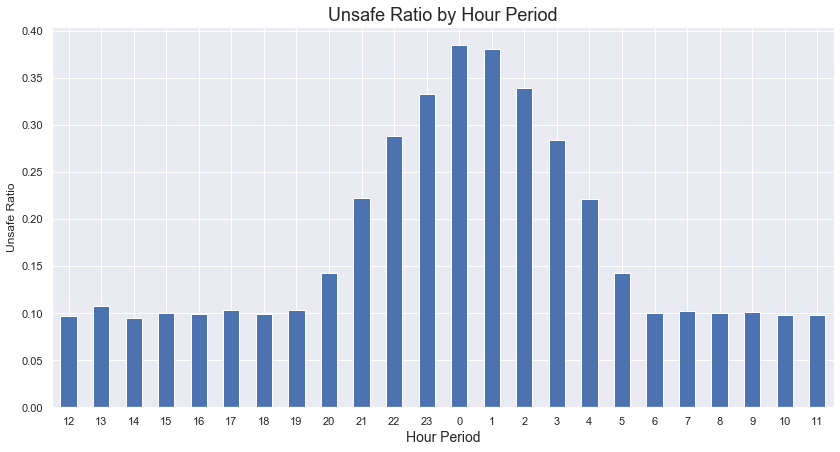

In [16]:
plt.figure(figsize = (14, 7))
test2['Unsafe Ratio'] = test2['unsafe'] / (test2['safe'] + test2['unsafe']) 
test2
test2['Unsafe Ratio'].loc[hourlist].plot.bar()
plt.title('Unsafe Ratio by Hour Period', fontsize = 18)
plt.xlabel('Hour Period', fontsize = 14)
plt.xticks(rotation = 0)
plt.ylabel('Unsafe Ratio')
plt.show()

In [17]:
df1_day = df1.copy()
df1_day['Date'] = df1_day['Date'].apply(lambda x: x.split('/'))
df1_day['Year'] = df1_day['Date'].apply(lambda x: x[2])
df1_day['Year'] = df1_day['Year'].astype(str).astype('int64')
df1_day['Month'] = df1_day['Date'].apply(lambda x: x[1])
df1_day['Month'] = df1_day['Month'].astype(str).astype('int64')
df1_day['Day'] = df1_day['Date'].apply(lambda x: x[0])
df1_day['Day'] = df1_day['Day'].astype(str).astype('int64')
df1_day.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Year,Month,Day
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]","[31, 07, 2016]",1224,5820,00:00:38,safe,2016,7,31
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]","[31, 07, 2016]",1385,5511,00:00:52,safe,2016,7,31
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]","[31, 07, 2016]",2257,5405,00:01:46,safe,2016,7,31
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]","[31, 07, 2016]",1242,5262,00:02:26,safe,2016,7,31
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]","[31, 07, 2016]",1787,5511,00:02:36,safe,2016,7,31


In [18]:
df1_day2 = df1_day[['Year', 'Month', 'Day']]
df1_day2 = pd.to_datetime(df1_day2)
df1_day2.dt.dayofweek
df1_day2 = pd.DataFrame(df1_day2.dt.dayofweek)
df1_day2.columns = ['Day']
weekdays = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df1_day2['Day of Week'] = df1_day2['Day'].map(weekdays)
df1_day2.head()

,Day,Day of Week
0,6,Sunday
1,6,Sunday
2,6,Sunday
3,6,Sunday
4,6,Sunday


In [19]:
df1_day3 = pd.concat([df1_day, df1_day2], axis = 1)
df1_day3.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Year,Month,Day,Day,Day of Week
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]","[31, 07, 2016]",1224,5820,00:00:38,safe,2016,7,31,6,Sunday
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]","[31, 07, 2016]",1385,5511,00:00:52,safe,2016,7,31,6,Sunday
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]","[31, 07, 2016]",2257,5405,00:01:46,safe,2016,7,31,6,Sunday
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]","[31, 07, 2016]",1242,5262,00:02:26,safe,2016,7,31,6,Sunday
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]","[31, 07, 2016]",1787,5511,00:02:36,safe,2016,7,31,6,Sunday


<Figure size 1008x504 with 0 Axes>

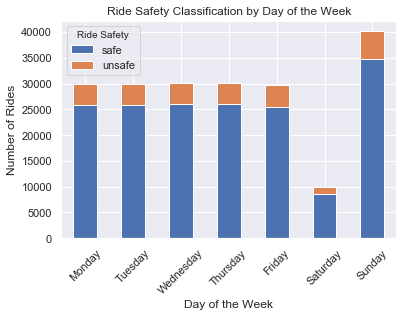

In [20]:
plt.figure(figsize = (14, 7))
test3 = df1_day3.groupby(['Day of Week', 'Unsafe'])['Day of Week'].count().unstack('Unsafe').fillna(0)
daylist = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
test3.loc[daylist].plot.bar(stacked = True)
plt.legend(title = 'Ride Safety')
plt.title('Ride Safety Classification by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation = 45)
plt.ylabel('Number of Rides')
plt.show()

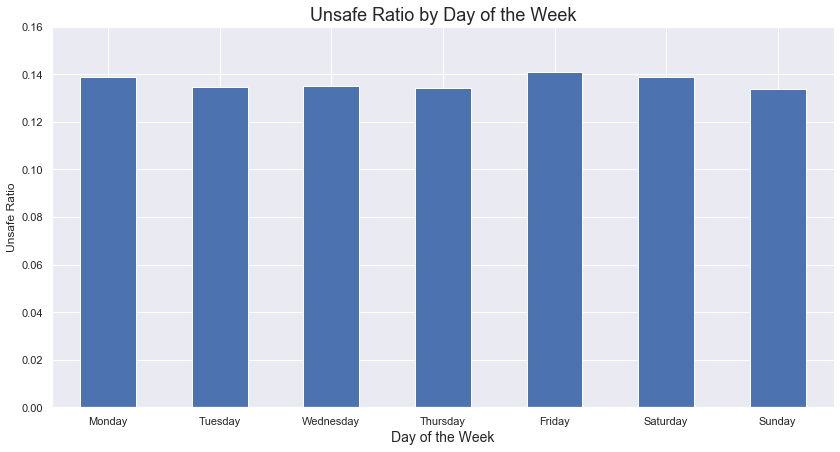

In [21]:
plt.figure(figsize = (14, 7))
test3['Unsafe Ratio'] = test3['unsafe'] / (test3['safe'] + test3['unsafe']) 
test3
test31 = test3['Unsafe Ratio'].loc[daylist].plot.bar()
plt.title('Unsafe Ratio by Day of the Week', fontsize = 18)
plt.xlabel('Day of the Week', fontsize = 14)
plt.xticks(rotation = 0)
plt.ylabel('Unsafe Ratio')
test31.set_ylim(0, 0.16)
plt.show()

In [22]:
Demand = {0: 'non-peak hours', 1: 'non-peak hours', 2: 'non-peak hours', 3: 'non-peak hours', 4: 'non-peak hours', 5: 'non-peak hours', 6: 'peak hours', 7: 'peak hours', 8: 'peak hours', 9: 'peak hours', 10: 'peak hours', 11: 'peak hours', 12: 'peak hours', 13: 'peak hours', 14: 'peak hours', 15: 'peak hours', 16: 'peak hours', 17: 'peak hours', 18: 'non-peak hours', 19: 'non-peak hours', 20: 'non-peak hours', 21: 'non-peak hours', 22: 'non-peak hours', 23: 'non-peak hours'}
df1_time['Peak or non-peak hours'] = df1_time['Hour Period'].map(Demand)
df1_timep = df1_time.loc[(df1_time['Peak or non-peak hours'].isin(["peak hours"]))]
df1_timep.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Hour Period,Peak or non-peak hours
944,"Riverfront Residences, Pasig","[121,07143857522; 14,5744004113661]",31/07/2016,3954,5283,"[06, 00, 00]",safe,6,peak hours
945,"0 Col. Bonny Serrano Avenue, Quezon City","[121,047868275862; 14,610108039323]",31/07/2016,2268,5242,"[06, 00, 07]",safe,6,peak hours
946,"M. Dela Cruz Extension, Pasay","[121,00379979117; 14,5392048959091]",31/07/2016,1844,5107,"[06, 00, 17]",safe,6,peak hours
947,"F. Ver, Manila","[121,04087465986; 14,5300247791074]",31/07/2016,2330,5020,"[06, 00, 18]",safe,6,peak hours
948,"Owl, Quezon City","[121,069533506765; 14,5940813122547]",31/07/2016,3175,5107,"[06, 00, 46]",safe,6,peak hours


In [23]:
df1_timenp = df1_time.loc[(df1_time['Peak or non-peak hours'].isin(["non-peak hours"]))]
df1_timenp.head()

,Destination Display Name,Destination Geometry,Date,Travel time (seconds),DriverID,Time,Unsafe,Hour Period,Peak or non-peak hours
0,"4800 Balderama, Makati","[121,005416381948; 14,5501868058048]",31/07/2016,1224,5820,"[00, 00, 38]",safe,0,non-peak hours
1,"0 1st Street, Quezon City","[121,034062093452; 14,6142310276554]",31/07/2016,1385,5511,"[00, 00, 52]",safe,0,non-peak hours
2,"0 Hydra, Makati","[121,031114652068; 14,5616123563658]",31/07/2016,2257,5405,"[00, 01, 46]",safe,0,non-peak hours
3,"Roxas Boulevard, Pasay","[120,989193110978; 14,5378405260156]",31/07/2016,1242,5262,"[00, 02, 26]",safe,0,non-peak hours
4,"100 Jupiter, Mandaluyong","[121,019737475982; 14,5822100699773]",31/07/2016,1787,5511,"[00, 02, 36]",safe,0,non-peak hours


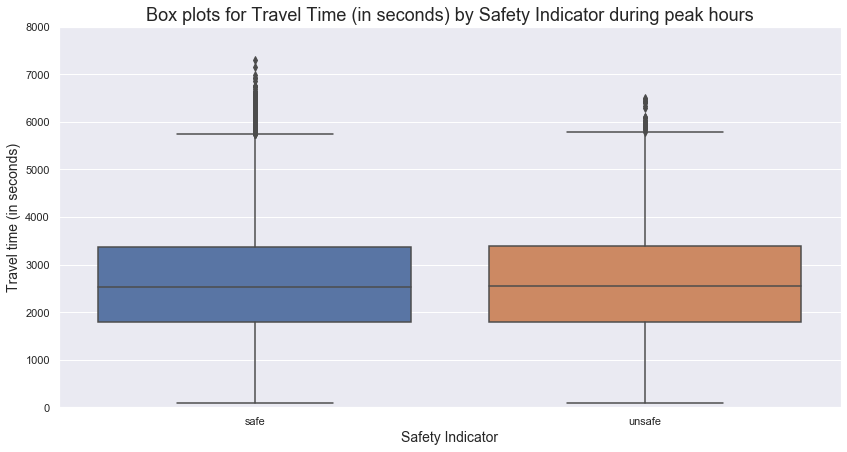

In [24]:
plt.figure(figsize = (14, 7))
test4 = sns.boxplot(x = 'Unsafe', y = 'Travel time (seconds)', data = df1_timep)
test4.set_ylim(0,8000)
plt.title('Box plots for Travel Time (in seconds) by Safety Indicator during peak hours', fontsize = 18)
plt.xlabel('Safety Indicator', fontsize = 14)
plt.ylabel('Travel time (in seconds)', fontsize = 14)
plt.show()

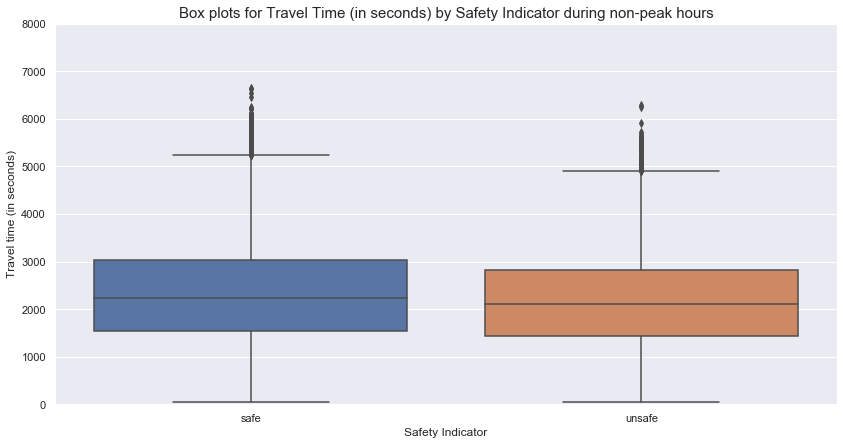

In [25]:
plt.figure(figsize = (14, 7))
test5 = sns.boxplot(x = 'Unsafe', y = 'Travel time (seconds)', data = df1_timenp)
test5.set_ylim(0,8000)
plt.title('Box plots for Travel Time (in seconds) by Safety Indicator during non-peak hours', fontsize = 15)
plt.xlabel('Safety Indicator')
plt.ylabel('Travel time (in seconds)')
plt.show()